# Clustering and Kmeans

http://tech.nitoyon.com/en/blog/2013/11/07/k-means/

In [11]:
#import libraries
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data = pd.read_csv('c:/Iris.csv')
data = data.drop('Id', axis=1) 
data.sample(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
89,5.5,2.5,4.0,1.3,Iris-versicolor
33,5.5,4.2,1.4,0.2,Iris-setosa
136,6.3,3.4,5.6,2.4,Iris-virginica
60,5.0,2.0,3.5,1.0,Iris-versicolor
15,5.7,4.4,1.5,0.4,Iris-setosa


In [8]:
# split data into features (X) and labels (y)

X = data.iloc[:,0:4]
y = data.iloc[:,-1]

print(X.sample(5))
print(y.sample(5))

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
19             5.1           3.8            1.5           0.3
25             5.0           3.0            1.6           0.2
45             4.8           3.0            1.4           0.3
116            6.5           3.0            5.5           1.8
16             5.4           3.9            1.3           0.4
122     Iris-virginica
137     Iris-virginica
84     Iris-versicolor
85     Iris-versicolor
39         Iris-setosa
Name: Species, dtype: object


# `Visualize Data`

How many samples we have of each species 

In [9]:
data["Species"].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

Use **seaborn** to make scatter plot showing species for each sample

C:\Users\amirr\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


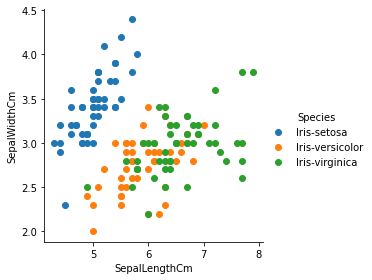

In [12]:
sns.FacetGrid(data, hue="Species", size=4) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend();

Do same for petals

C:\Users\amirr\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


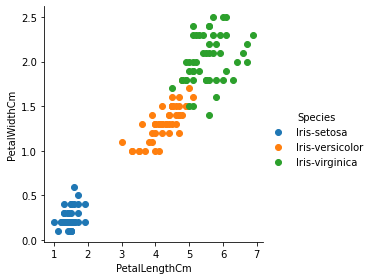

In [13]:
sns.FacetGrid(data, hue="Species", size=4) \
   .map(plt.scatter, "PetalLengthCm", "PetalWidthCm") \
   .add_legend();

The species are nearly linearly separable with petal size,
but sepal sizes are more mixed.

### show petal length distributions in a swarm plot 

C:\Users\amirr\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 14.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


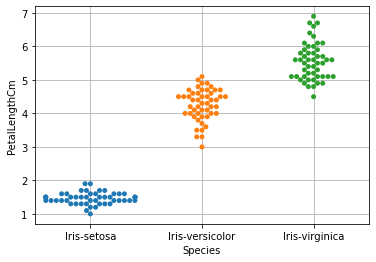

In [39]:
sns.swarmplot(x="Species", y="PetalLengthCm", data=data)
plt.grid()

C:\Users\amirr\anaconda3\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


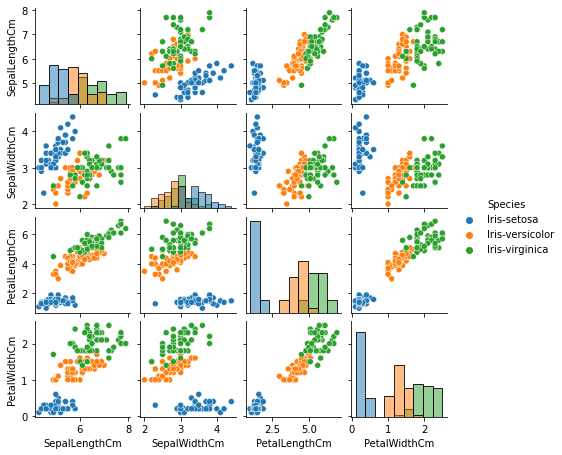

In [15]:
sns.pairplot(data, hue="Species", diag_kind="hist", size=1.6);

# `Feature Scaling`

the data is unbalanced (eg sepallength ~4x petalwidth)

so should do feature scaling, otherwise the larger features will dominate the others in clustering, etc.

In [16]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()

scaler.fit(X)
X_scaled_array = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled_array, columns = X.columns)

X_scaled.sample(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
15,-0.173674,3.114684,-1.284407,-1.050031
146,0.553333,-1.281972,0.705893,0.922064
140,1.038005,0.106445,1.047087,1.579429
111,0.674501,-0.819166,0.876490,0.922064
50,1.401508,0.337848,0.535296,0.264699


# `K-Means Clustering`

* try clustering on the 4D data and see if can reproduce the actual clusters.

* imagine we don't have the species labels on this data and wanted to


In [24]:
from sklearn.cluster import KMeans

nclusters = 3 
seed = 0

km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(X_scaled)

# predict the cluster for each data point
y_cluster_kmeans = km.predict(X_scaled)
y_cluster_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

**Silhouette score** - a value near +1 indicates that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster.

In [25]:
from sklearn import metrics
score = metrics.silhouette_score(X_scaled, y_cluster_kmeans)
score

0.4589717867018717

This is the **mean** over all the samples - there might be some clusters that are well separated and others that are closer together.  

### So let's look at the distribution of silhouette scores

C:\Users\amirr\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


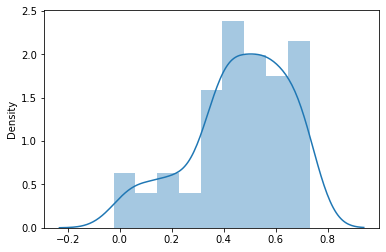

In [26]:
scores = metrics.silhouette_samples(X_scaled, y_cluster_kmeans)
sns.distplot(scores);

Add the species info to that plot separately using pandas

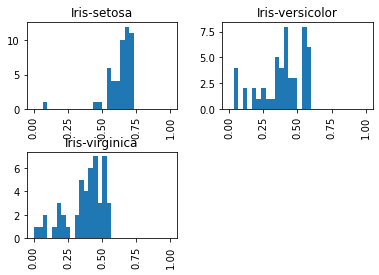

In [53]:
df_scores = pd.DataFrame()

df_scores['SilhouetteScore'] = scores
df_scores['Species'] = data['Species']

df_scores.hist(by='Species', column='SilhouetteScore', range=(0,1.0), bins=30);

so as expected, versicolor and virginica have lower silhouette scores than the more separate setosas, because they are closer together.

### put them all on one histogram

see https://github.com/mwaskom/seaborn/issues/861

C:\Users\amirr\anaconda3\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


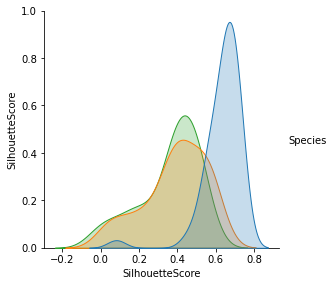

In [54]:
sns.pairplot(df_scores, hue="Species", size=4);

In [ ]:
# so you can see that the blue species have higher silhouette scores
# (the legend doesn't show the colors though... so the pandas plot is more useful). 

# note that if we used the best mean silhouette score to try to find the best
# number of clusters k, we'd end up with 2 clusters, because the mean silhouette 
# score in that case would be largest, since the clusters would be better separated. 

# Iris without scaling

In [55]:
#import the dataset
df2 = pd.read_csv('c:/Iris.csv')
df2.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [57]:
x = df2.iloc[:, [0,1,2,3]].values

In [58]:
kmeans5 = KMeans(n_clusters=5)
y_kmeans5 = kmeans5.fit_predict(x)
print(y_kmeans5)

kmeans5.cluster_centers_

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3]


array([[ 45.5       ,   5.35      ,   3.20333333,   2.42333333],
       [106.5       ,   6.3       ,   2.87666667,   5.15666667],
       [ 15.5       ,   5.02666667,   3.45      ,   1.47333333],
       [136.        ,   6.59655172,   3.00344828,   5.47586207],
       [ 76.        ,   5.96451613,   2.74516129,   4.30322581]])

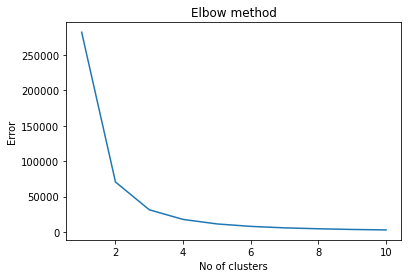

In [59]:
Error =[]

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
    
import matplotlib.pyplot as plt

plt.plot(range(1, 11), Error)

plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('inertia')

# plt.show()

In [75]:
kmeans3 = KMeans(n_clusters=3)
y_kmeans3 = kmeans3.fit_predict(x)
print(y_kmeans3)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


In [79]:
kmeans3.cluster_centers_[0]

array([125.5  ,   6.588,   2.974,   5.552])

In [80]:
kmeans3.cluster_centers_

array([[125.5  ,   6.588,   2.974,   5.552],
       [ 25.5  ,   5.006,   3.418,   1.464],
       [ 75.5  ,   5.936,   2.77 ,   4.26 ]])

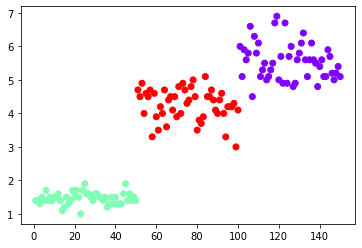

In [87]:
plt.scatter(x[:,0] , x[:,3], c =y_kmeans3 , cmap = "rainbow" );

# `Principal Component Analysis (PCA)`

If you have a lot of features it can be helpful to do some feature reduction to avoid the curse of dimensionality

you can *also* use PCA to visualize the data by reducing the features to 2 dimensions and making a scatterplot. 

In [30]:
from sklearn.decomposition import PCA

ndimensions = 2

pca = PCA(n_components=ndimensions, random_state=seed)
pca.fit(X_scaled)
X_pca_array = pca.transform(X_scaled)
X_pca = pd.DataFrame(X_pca_array, columns=['PC1','PC2']) # PC=principal component
X_pca.sample(5)

,PC1,PC2
12,-2.224083,-0.709118
111,1.599065,-0.428249
82,0.236011,-0.775924
19,-2.339949,1.158033
48,-2.226781,1.025483


In [32]:


# so that gives us new 2d coordinates for each data point.

# at this point, if you don't have labelled data,
# you can add the k-means cluster ids to this table and make a
# colored scatterplot. 

# we do actually have labels for the data points, but let's imagine
# we don't, and use the predicted labels to see what the predictions look like.

# first, convert species to an arbitrary number
y_id_array = pd.Categorical(data['Species']).codes

df_plot = X_pca.copy()
df_plot['ClusterKmeans'] = y_cluster_kmeans
df_plot['SpeciesId'] = y_id_array # also add actual labels so we can use it in later plots
df_plot.sample(5)



,PC1,PC2,ClusterKmeans,SpeciesId
39,-2.170547,0.292727,1,0
23,-1.820412,0.106751,1,0
51,0.732481,0.598636,0,1
108,2.001735,-0.723865,0,2
121,0.973915,-0.571174,2,2


In [33]:
# so now we can make a 2d scatterplot of the clusters
# first define a plot fn

def plotData(df, groupby):
    "make a scatterplot of the first two principal components of the data, colored by the groupby field"
    
    # make a figure with just one subplot.
    # you can specify multiple subplots in a figure, 
    # in which case ax would be an array of axes,
    # but in this case it'll just be a single axis object.
    fig, ax = plt.subplots(figsize = (7,7))

    # color map
    cmap = mpl.cm.get_cmap('prism')

    # we can use pandas to plot each cluster on the same graph.
    # see http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html
    for i, cluster in df.groupby(groupby):
        cluster.plot(ax = ax, # need to pass this so all scatterplots are on same graph
                     kind = 'scatter', 
                     x = 'PC1', y = 'PC2',
                     color = cmap(i/(nclusters-1)), # cmap maps a number to a color
                     label = "%s %i" % (groupby, i), 
                     s=30) # dot size
    ax.grid()
    ax.axhline(0, color='black')
    ax.axvline(0, color='black')
    ax.set_title("Principal Components Analysis (PCA) of Iris Dataset");

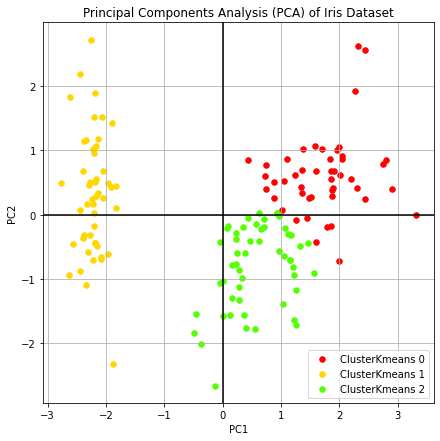

In [37]:
# plot the clusters each datapoint was assigned to
import matplotlib as mpl
plotData(df_plot, 'ClusterKmeans')

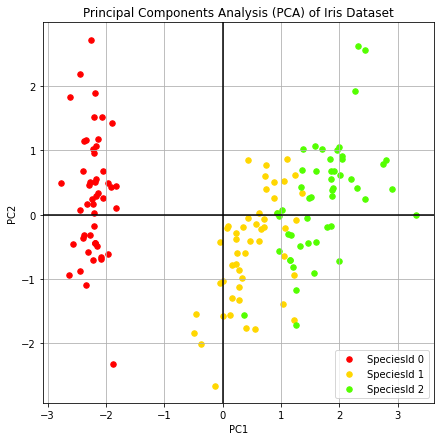

In [38]:
# so those are the *predicted* labels - what about the *actual* labels?
plotData(df_plot, 'SpeciesId')

In [ ]:
# so the k-means clustering *did not* find the correct clusterings!

# q. so what do these dimensions mean?

# they're the principal components, which pick out the directions 
# of maximal variation in the original data.
# PC1 finds the most variation, PC2 the second-most. 
# the rest of the data is basically thrown away when the data is reduced down to 2d.

# q. if these principal components represent some latent (hidden) features, what would those be? 

# maybe size (area) of the petals and sepals? 

**Principal Component Analysis (PCA)** is useful for visualizing high-dimensional datasets, as it can compress it down to 2 dimensions. It's also useful for reducing the dimensionality of high-dimensional datasets, which require exponentially more data as the number of dimensions increase, but we didn't need to do that in this case because the dataset was rather small

In [3]:
data = pd.read_csv('c:/loan.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


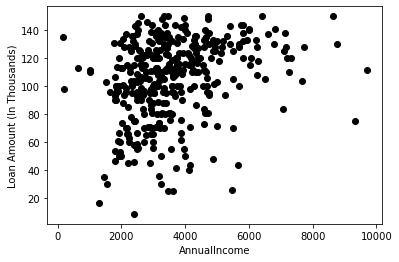

In [4]:
X = data[["LoanAmount","ApplicantIncome"]]

plt.scatter(X["ApplicantIncome"],X["LoanAmount"],c='black')
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

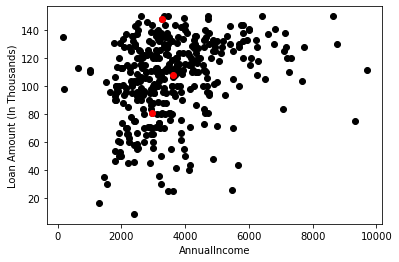

In [7]:

#number of clusters
K=3

# Select random observation as centroids
Centroids = (X.sample(n=K))

plt.scatter(X["ApplicantIncome"],X["LoanAmount"],c='black')
plt.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"],c='red')

plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

In [8]:
# Step 3 - Assign all the points to the closest cluster centroid
# Step 4 - Recompute centroids of newly formed clusters
# Step 5 - Repeat step 3 and 4

diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["ApplicantIncome"]-row_d["ApplicantIncome"])**2
            d2=(row_c["LoanAmount"]-row_d["LoanAmount"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['LoanAmount'] - Centroids['LoanAmount']).sum() + (Centroids_new['ApplicantIncome'] - Centroids['ApplicantIncome']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]

C:\Users\amirr\anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\amirr\anaconda3\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


486.8914076020702
398.0298281157436
156.6587051731436
241.75650104316816
284.41335268050597
211.50041280045707
223.00303487546444
187.01068731505586
98.01161657776196
52.84741626127729
98.54724443834282
90.64953219227577
18.274686272279013
9.21023994083339
18.345487493007468
46.27013250786139
0.0


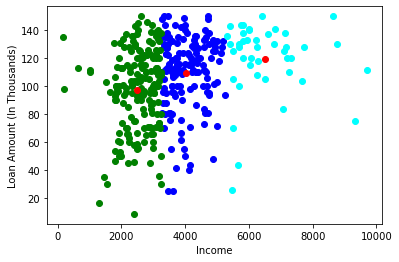

In [9]:
color=['blue','green','cyan']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["ApplicantIncome"],data["LoanAmount"],c=color[k])
    
plt.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"],c='red')
plt.xlabel('Income')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

 we want to make 3 clusters here

<div img style="float: center">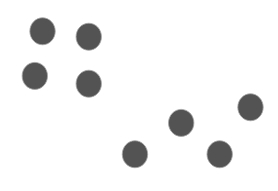</div> 

the first step is to randomly pick a data point as a cluster centroid

<div img style="float: center">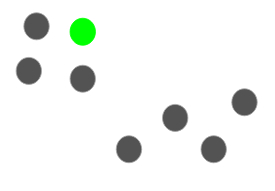</div> 

Let’s say we pick the green point as the initial centroid. Now, we will calculate the distance of each data point with this centroid

<div img style="float: center">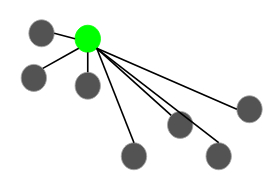</div> 

the next centroid will be the one whose squared distance is the farthest from the current centroid:

<div img style="float: center">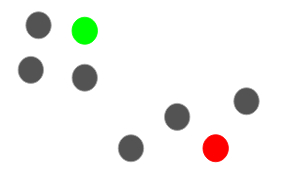</div> 

In this case, the red point will be selected as the next centroid. Now, to select the last centroid, we will take the distance of each point from its closest centroid and the point having the largest squared distance will be selected as the next centroid

<div img style="float: center">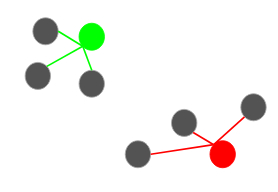</div> 

We will select the last centroid as:

<div img style="float: center">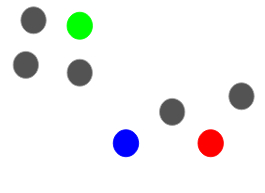</div> 

#### Using K-Means++ to initialize the centroids tends to improve the clusters

# Wholesale customers data

#### The goal of this problem is to:

* segment the clients of a wholesale distributor based on their annual spending on diverse product categories, like milk, grocery, region, etc

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

In [90]:
# reading the data and looking at the first five rows of the data
data=pd.read_csv("c:/Wholesale customers data.csv")
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [91]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


we see that there is a lot of variation in the magnitude of the data

In [92]:
# standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# statistics of scaled data
pd.DataFrame(data_scaled).describe()

,0,1,2,3,4,5,6,7
count,4.400000e+02,4.400000e+02,4.400000e+02,440.000000,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,1.614870e-17,3.552714e-16,-3.431598e-17,0.000000,-4.037175e-17,3.633457e-17,2.422305e-17,-8.074349e-18
std,1.001138e+00,1.001138e+00,1.001138e+00,1.001138,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00
min,-6.902971e-01,-1.995342e+00,-9.496831e-01,-0.778795,-8.373344e-01,-6.283430e-01,-6.044165e-01,-5.402644e-01
25%,-6.902971e-01,-7.023369e-01,-7.023339e-01,-0.578306,-6.108364e-01,-4.804306e-01,-5.511349e-01,-3.964005e-01
50%,-6.902971e-01,5.906683e-01,-2.767602e-01,-0.294258,-3.366684e-01,-3.188045e-01,-4.336004e-01,-1.985766e-01
75%,1.448652e+00,5.906683e-01,3.905226e-01,0.189092,2.849105e-01,9.946441e-02,2.184822e-01,1.048598e-01
max,1.448652e+00,5.906683e-01,7.927738e+00,9.183650,8.936528e+00,1.191900e+01,7.967672e+00,1.647845e+01


In [93]:
# defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters=2, init='k-means++')

# fitting the k means algorithm on scaled data
kmeans.fit(data_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

We have initialized two clusters and pay attention – the initialization is not random here. We have used the k-means++ initialization which generally produces better results as we have discussed in the previous section as well

In [94]:
# inertia on the fitted data with k =2
kmeans.inertia_

2599.384423783625

Text(0, 0.5, 'Inertia')

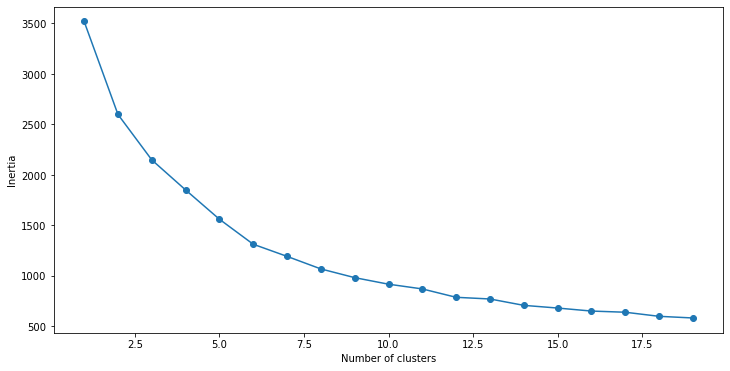

In [95]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []

for cluster in range(1,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})

plt.figure(figsize=(12,6))

plt.plot(frame['Cluster'], frame['SSE'], marker='o')

plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

#### Looking at the above elbow curve, we can choose any number of clusters between 5 to 8.

In [96]:
# k means using 5 clusters and k-means++ initialization

kmeans = KMeans(n_clusters = 5, init='k-means++')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)

In [97]:
frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

0    210
1    125
3     92
4     12
2      1
Name: cluster, dtype: int64

In [98]:
frame

,0,1,2,3,4,5,6,7,cluster
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339,1
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151,1
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293,1
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411,0
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347,1
...,...,...,...,...,...,...,...,...,...
435,-0.690297,0.590668,1.401312,0.848446,0.850760,2.075222,-0.566831,0.241091,0
436,-0.690297,0.590668,2.155293,-0.592142,-0.757165,0.296561,-0.585519,0.291501,0
437,1.448652,0.590668,0.200326,1.314671,2.348386,-0.543380,2.511218,0.121456,1
438,-0.690297,0.590668,-0.135384,-0.517536,-0.602514,-0.419441,-0.569770,0.213046,0


So, there are 210 data points belonging to cluster 2 (index 1), then 125 points in cluster 1 (index 0), and so on. This is how we can implement K-Means Clustering in Python

#### Hint: The maximum possible number of clusters will be equal to the number of observations in the dataset

# Inertia

Inertia actually calculates **the sum of distances of all the points within a cluster from the centroid of that cluster**.  inertia tries to minimize the intracluster distance



#### Hint1:  <font color='Red'>the distance between them should be as low as possible.</font>

#### Hint2: we can say that the lesser the inertia value, the better our clusters are

<div img style="float: center">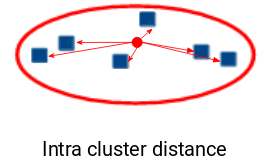</div> 

# Dunn index

the Dunn index also takes into account the distance between two clusters. This distance between the centroids of two different clusters is known as inter-cluster distance

We want to maximize the Dunn index. The more the value of the Dunn index, the better will be the cluster

the aim of this Dunn index to identify sets of clusters that are compact, with a small variance between members of the cluster, and well separated.

Higher the Dunn index value, better is the clustering. The number of clusters that maximizes Dunn index is taken as the optimal number of clusters k.



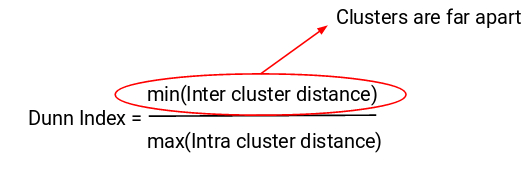

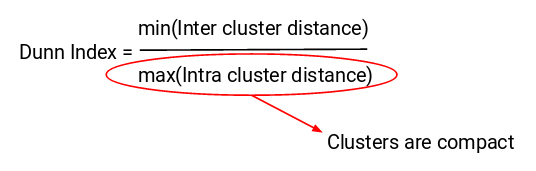

درصورتی که داده ها به درستی خوشه بندی شده باشند، مخرج کسر کاهش یافته یعنی بیشترین فاصله درون خوشه ای بایستی کاهش یابد.

The maximum distance between the cluster centroids and the points should be minimum which will eventually make sure that the clusters are compact.

If the data set contains compact and well-separated clusters, the diameter of the clusters is expected to be small and the distance between the clusters is expected to be large. Thus, Dunn index should be maximized

# elbow curve

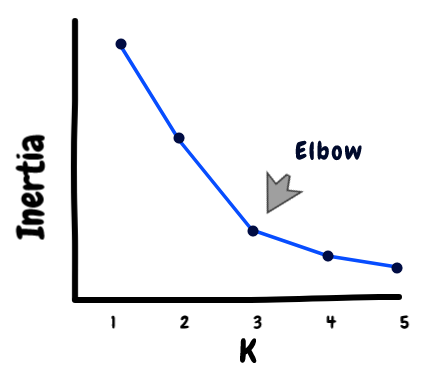

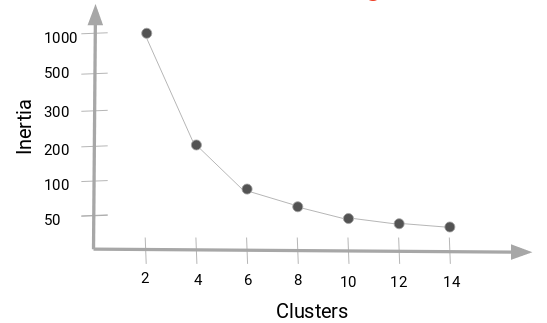

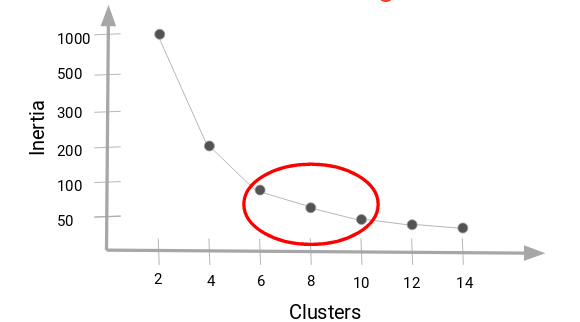

# Silhouette Score Index (SSI)

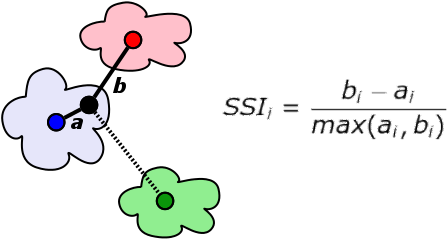

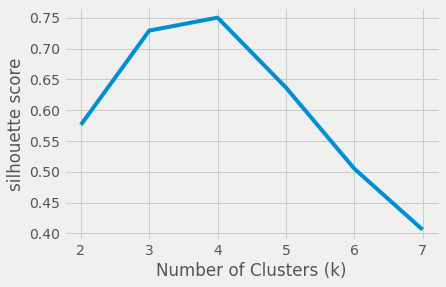